<a href="https://colab.research.google.com/github/AmiMunshi/MachineLearningNew/blob/main/ML_Lab6_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

import warnings #to remove the warnings
warnings.filterwarnings('ignore')

Implementation of kNN using the built in fucntion KNeighboursClassifier from sklearn

In [ ]:
df= pd.read_csv('/content/Iris.csv') #read the dataset

In [ ]:
df.head() #Visualize the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns #display the columns of the dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.describe() #to know about dataset statistics

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Replace the the classes in Species column by 0, 1,2
df= df.replace({"Species": {"Iris-setosa":0, "Iris-virginica":1, "Iris-versicolor":2}}) #

In [ ]:
df=df.drop(['Id'],axis=1) #drop the irrelavant columns

In [ ]:
#Normalizing the attributes
df['SepalLengthCm']=df['SepalLengthCm']/max(df['SepalLengthCm'])
df['SepalWidthCm']=df['SepalWidthCm']/max(df['SepalWidthCm'])
df['PetalLengthCm']=df['PetalLengthCm']/max(df['PetalLengthCm'])
df['PetalWidthCm']=df['PetalWidthCm']/max(df['PetalWidthCm'])

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.645570,0.795455,0.202899,0.08,0
1,0.620253,0.681818,0.202899,0.08,0
2,0.594937,0.727273,0.188406,0.08,0
3,0.582278,0.704545,0.217391,0.08,0
4,0.632911,0.818182,0.202899,0.08,0


In [ ]:
#Define the independent and dependent variables
y= df['Species'] #dependent variable is price
x= df.drop(['Species','PetalWidthCm','PetalLengthCm', 'SepalWidthCm'], axis=1)

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Train the model using the training sets
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

0.8

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[13  0  1]
 [ 2 10  1]
 [ 6  5  7]]


In [ ]:
k_list= list(range(1,16,2))
print(k_list)


[1, 3, 5, 7, 9, 11, 13, 15]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [ ]:
error=[]
accuracy=[]
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  #Train the model using the training sets
  knn.fit(x_train, y_train)
  #Predict the response for test dataset
  y_pred = knn.predict(x_test)
  error.append(mean_squared_error(y_test, y_pred))
  accuracy.append(accuracy_score(y_test, y_pred))
error=np.array(error, dtype=float)
accuracy=np.array(accuracy, dtype=float)

In [ ]:
print(error)

[1.37777778 0.8        0.77777778 0.75555556 0.57777778 0.6
 0.51111111 0.33333333]


In [ ]:
print(accuracy)

[0.42222222 0.66666667 0.68888889 0.71111111 0.68888889 0.66666667
 0.75555556 0.8       ]


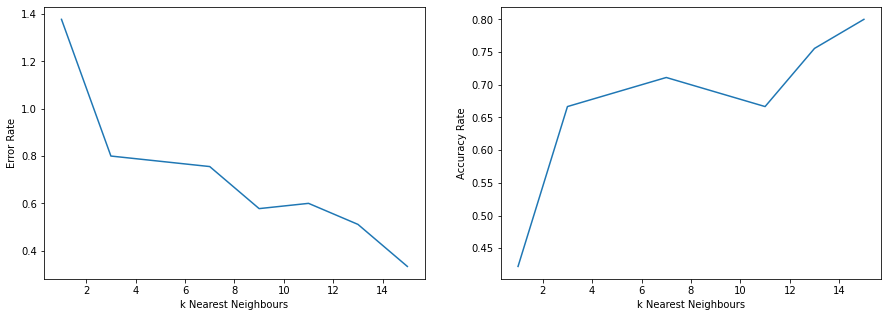

In [ ]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.xlabel("k Nearest Neighbours")
plt.ylabel("Error Rate")
#plt.ylim(0, 0.2) 
plt.plot(k_list,error)
plt.subplot(1,2,2)
plt.xlabel("k Nearest Neighbours")
plt.ylabel("Accuracy Rate")
plt.plot(k_list,accuracy)


kNN without using the built function

In [ ]:
i= x_train.index
print(list(i))

[26, 15, 0, 68, 3, 51, 116, 131, 14, 61, 84, 98, 125, 50, 73, 149, 57, 130, 66, 110, 8, 87, 86, 137, 118, 138, 106, 34, 112, 53, 146, 27, 41, 19, 24, 29, 54, 40, 111, 60, 140, 18, 109, 108, 124, 47, 115, 10, 126, 65, 145, 78, 30, 22, 55, 128, 63, 38, 129, 132, 100, 105, 121, 117, 13, 35, 95, 74, 90, 76, 141, 120, 58, 77, 59, 97, 33, 43, 49, 91, 31, 104, 46, 52, 28, 72, 114, 44, 20, 75, 82, 139, 81, 56, 64, 147, 2, 136, 11, 83, 122, 42, 7, 107, 135]


In [ ]:
#select a data sample from x_test
ind_xtest= list(x_test.index)
print(ind_xtest)

[80, 79, 89, 99, 102, 127, 48, 36, 148, 93, 142, 39, 94, 37, 133, 23, 71, 69, 119, 9, 103, 32, 96, 1, 62, 123, 5, 144, 143, 45, 134, 4, 16, 12, 113, 21, 6, 88, 67, 101, 92, 17, 85, 25, 70]


In [ ]:
x_train.iloc[26]

SepalLengthCm    0.620253
Name: 106, dtype: float64